# Learning Gate - Reto: Deserción de empleados

#### Data Science Fundamentals - Features Engineering

## Introduction
 
Una empresa de productos médicos está interesada en atraer y mantener al mejor talento porque sabe que es la clave del éxito para cualquier organización. También toma en cuenta que, si un empleado abandona la empresa, se está provocando una pérdida de tiempo y dinero debido, entre otras cosas, a la inversión en capacitación y a la experiencia acumulada del empleado. Desde luego que hay algunas formas de deserción que son inevitables, como cuando un empleado se retira o cambia de ciudad de residencia. Sin embargo, existen algunos factores que se pueden controlar por parte de la empresa con el objetivo de minimizar la deserción al mejorar las condiciones de trabajo. A la empresa le interesa saber cuáles son los factores que hacen que un empleado siga con ellos y cuáles son los que se deben cambiar debido a que provocan que los empleados se vayan. 

Aunque la empresa sabe que este estudio tiene muchas aristas desea empezar con algo muy simple: determinando si un empleado abandonará la empresa Attrition o no en un momento dado. Como se trata de un problema de clasificación binaria, lo más probable es que utilicen un modelo de machine learning. La empresa ha logrado recolectar 30 datos de 400 de sus empleados, pero no está segura si ese conjunto de datos sean los correctos para lo que pretende hacer, por lo que decidió contratarte como científico de datos para generar un set de datos adecuado para esta actividad. 


### Objective:
 
#### *A través de este reto vas a lograr:*
 
- Evaluar las características de un conjunto de datos con el fin de ver si son suficientes para la actividad en la que serán usados. 
- Crear nuevas características a partir de las existentes, que logren proporcionar una mayor información para la actividad en la que se usarán. 
- Eliminar las características que sean irrelevantes para el uso que se le dará al conjunto de datos.


## Importing Libraries

#### 1. Importa las librerías requeridas

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from Functions.Functions import PCAvariance, PCAcompWeights

%matplotlib inline

## Loading Data
#### 2.	Lee el archivo CSV

In [2]:
path = os.path.join(os.getcwd(), 'Data', 'EmpleadosRETO.csv')
df = pd.read_csv(path)
display(df.head())

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,Attrition
0,50,Travel_Rarely,Research & Development,1 km,2,Medical,1,997,4,Male,...,22,4,3,80,32,1,2,4,1,No
1,36,Travel_Rarely,Research & Development,6 km,2,Medical,1,178,2,Male,...,20,4,4,80,7,0,3,2,0,No
2,21,Travel_Rarely,Sales,7 km,1,Marketing,1,1780,2,Male,...,13,3,2,80,1,3,3,0,1,Yes
3,52,Travel_Rarely,Research & Development,7 km,4,Life Sciences,1,1118,2,Male,...,19,3,4,80,18,4,3,6,4,No
4,33,Travel_Rarely,Research & Development,15 km,1,Medical,1,582,2,Male,...,12,3,4,80,15,2,4,6,7,Yes


## Exploratory Data Anallysis

In [3]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,391.0,38.094629,8.750897,18.0,31.0,37.0,44.0,60.0
Education,391.0,2.936061,1.056605,1.0,2.0,3.0,4.0,5.0
EmployeeCount,391.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,391.0,1008.856777,607.444251,1.0,467.5,1004.0,1534.5,2068.0
EnvironmentSatisfaction,391.0,2.670077,1.121400,1.0,2.0,3.0,4.0,4.0
JobInvolvement,391.0,2.687980,0.733683,1.0,2.0,3.0,3.0,4.0
JobLevel,391.0,2.163683,1.120353,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,391.0,2.677749,1.117915,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,391.0,6911.409207,4884.034673,1009.0,3036.0,5301.0,9731.5,19926.0
NumCompaniesWorked,391.0,2.864450,2.535803,0.0,1.0,2.0,4.0,9.0


## Features Engineering



#### 3.	Elimina las columnas que, con alta probabilidad (estimada por ti), no tienen relación alguna con la salida. Hay algunas columnas que contienen información que no ayuda a definir el desgaste de un empleado, tal es caso de las siguientes:

In [4]:
cols2drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours', 'OverTime'] # JobRole
df = df.drop(cols2drop, axis=1)


#### 4.	Analizando la información proporcionada, detectaste que no se cuenta con los años que el empelado lleva en la compañía y parece ser un buen dato. Dicha cantidad se puede calcular con la fecha de contratación ‘HiringDate’

In [5]:
current_year = 2018
df['Hiring_Year'] = df.HiringDate.str.split('/').str[2].astype(int)
df['YearsAtCompany'] = current_year - df['Hiring_Year']

#### 5.	La variable DistanceFromHome está dada en kilómetros, pero tiene las letras “km” al final y así no puede ser entera

In [6]:
df.rename(columns={'DistanceFromHome':'DistanceFromHome_km'}, inplace=True)
df['DistanceFromHome'] = df.DistanceFromHome_km.str.split().str[0].astype(int)

#### 6.	Borra las columnas Year, HiringDate y DistanceFromHome_km debido a que ya no son útiles

In [7]:
cols2drop = ['Hiring_Year', 'HiringDate', 'DistanceFromHome_km'] # JobRole
df.drop(cols2drop, axis=1, inplace=True)

#### 7.	Aprovechando los ajustes que se están haciendo, la empresa desea saber si todos los departamentos tienen un ingreso promedio similar. Genera una nuevo frame llamado SueldoPromedioDepto que contenga el MonthlyIncome promedio por departamento de los empleados y colócalo en una variable llamada SueldoPromedio. Esta tabla solo es informativa, no la vas a utilizar en el set de datos que estás construyendo

In [8]:
SueldoPromedioDepto = df.groupby('Department', as_index=False)[['MonthlyIncome']].mean()
SueldoPromedioDepto.rename(columns={'MonthlyIncome':'SueldoPromedio'}, inplace=True)
display(SueldoPromedioDepto)

,Department,SueldoPromedio
0,Human Resources,6239.888889
1,Research & Development,6806.326923
2,Sales,7184.893443


#### 8.	La variable MonthlyIncome tiene un valor numérico muy grande comparada con las otras variables. Escala dicha variable para que tenga un valor entre 0 y 1

In [9]:
prev_stats = df.MonthlyIncome.describe().values
scaler = MinMaxScaler()
df.loc[:, 'MonthlyIncome'] = scaler.fit_transform(df[['MonthlyIncome']])
pd.DataFrame({'MonthlyIncome':df.MonthlyIncome.describe().values, 'Old_MonthlyIncome':prev_stats}, index=df.MonthlyIncome.describe().index)

,MonthlyIncome,Old_MonthlyIncome
count,391.000000,391.000000
mean,0.312016,6911.409207
std,0.258182,4884.034673
min,0.000000,1009.000000
25%,0.107152,3036.000000
50%,0.226886,5301.000000
75%,0.461093,9731.500000
max,1.000000,19926.000000


#### 9.	Todo parece indicar que las variables categóricas que quedan sí son importantes para obtener la variable de salida. Convierte todas las variables categóricas que quedan a numéricas:

In [10]:
catcols = df.dtypes[df.dtypes == type(str)].index.tolist()
bolcols = [col for col in catcols if df[col].unique().shape[0]==2]
catcols = [col for col in catcols if col not in bolcols]

for col in bolcols:
    df[col].replace(df[col].unique().tolist(),[0, 1], inplace=True)

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[catcols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(catcols))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded.drop(catcols, axis=1, inplace=True)
display(df_encoded.head())

,Age,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50,2,4,0,3,4,4,0.866416,9,22,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,36,2,2,0,3,2,2,0.207855,6,20,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21,1,2,0,3,1,2,0.088280,1,13,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,52,4,2,0,3,3,2,0.498811,7,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,2,0,3,3,3,0.666120,7,12,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### 10.	Ahora debes hacer la evaluación de las variables para quedarte con las mejores. Calcula la correlación lineal de cada una de las variables con respecto al Attrition

- ***General Correlation Matrix***

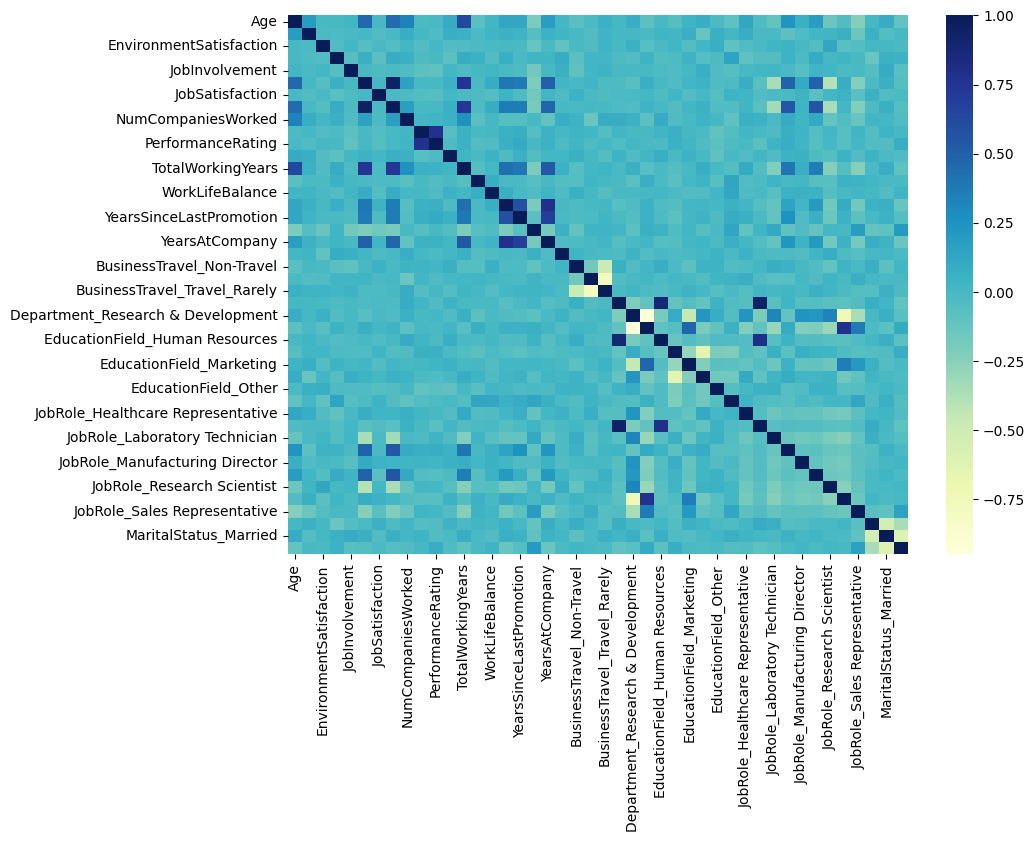

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
sns.heatmap(df_encoded.corr(), cmap="YlGnBu", annot=False, ax=ax);

- ***Correlation between the Attrition and the rest of the Variables***

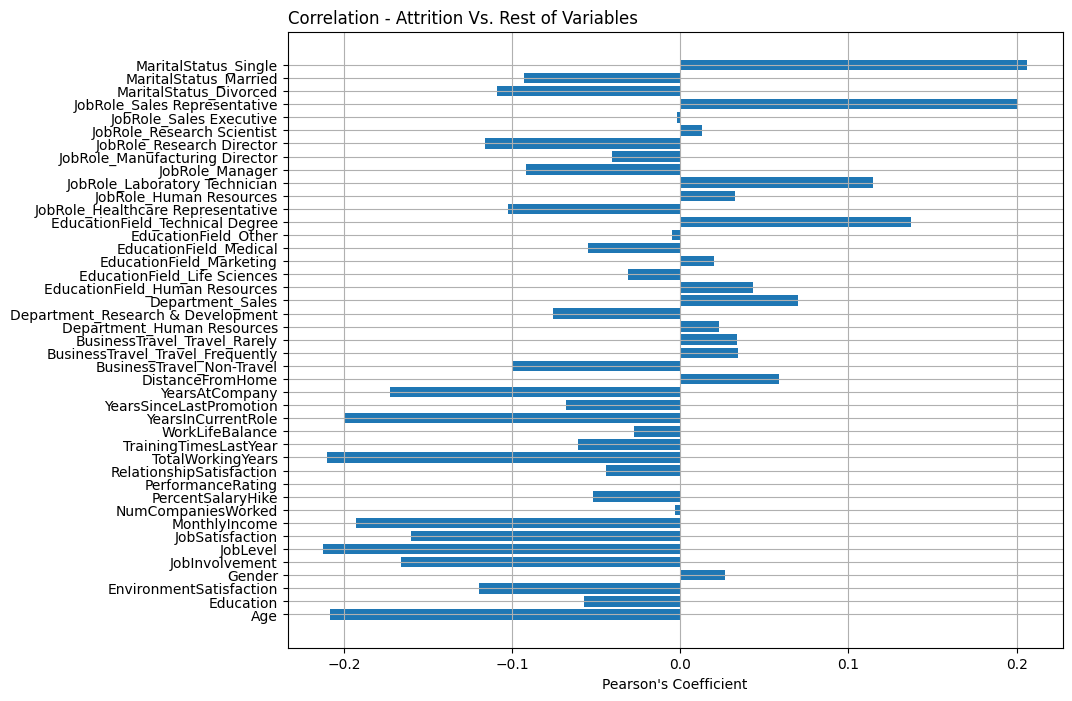

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
corr = df_encoded.corr().drop('Attrition')
ax.barh(corr[['Attrition']].index.tolist(), corr[['Attrition']].values.transpose()[0])
# Add Plot Title
ax.set_title('Correlation - Attrition Vs. Rest of Variables',
             loc ='left', )
ax.set_xlabel("Pearson's Coefficient")
ax.grid()

#### 11.	Selecciona solo aquellas variables que tengan una correlación mayor o igual a 0.1, dejándolas en otro frame llamado EmpleadosAttritionFinal. No olvides mantener la variable de salida Attrition; esto es equivalente a borrar las que no cumplen con el límite

In [13]:
corr = df_encoded.corr()
low_thrsld = 0.1
cols = corr['Attrition'][np.abs(corr['Attrition'])>=low_thrsld].index.tolist()
EmpleadosAttritionFinal = df_encoded[cols]

cols = []
for col in EmpleadosAttritionFinal.columns:
    if len(col.split('_'))>1:
        cols.append(col.split('_')[1:][0].replace(' ', '_'))
    else:
        cols.append(col)

EmpleadosAttritionFinal.columns =  cols
cols = EmpleadosAttritionFinal.columns.tolist()
target = 'Attrition'
cols.remove(target)
cols.append(target)
EmpleadosAttritionFinal = EmpleadosAttritionFinal[cols]

display(EmpleadosAttritionFinal.head(5))

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,YearsInCurrentRole,YearsAtCompany,Non-Travel,Technical_Degree,Healthcare_Representative,Laboratory_Technician,Research_Director,Sales_Representative,Divorced,Single,Attrition
0,50,4,3,4,4,0.866416,32,4,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,36,2,3,2,2,0.207855,7,2,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,21,2,3,1,2,0.088280,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
3,52,2,3,3,2,0.498811,18,6,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,33,2,3,3,3,0.666120,15,6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


#### 12.	Crea una nueva variable llamada EmpleadosAttritionPCA formada por los componentes principales del frame EmpleadosAttritionFinal. Recuerda que el resultado del proceso PCA es un numpy array, por lo que, para hacer referencia a una columna, por ejemplo, la 0, puedes usar la instrucción EmpleadosAttritionPCA[:,0])

- ***Finding the PCA components***

In [14]:
# Apply PCA to the data.
columns = EmpleadosAttritionFinal.columns
pca = PCA()
pca.fit(EmpleadosAttritionFinal[columns])

PCA()

- ***Creating EmpleadosAttritionPCA variable***

In [15]:
EmpleadosAttritionPCA = pca.transform(EmpleadosAttritionFinal[columns])

#### 13.	Agrega el mínimo número de Componentes Principales en columnas del frame EmpleadosAttritionPCA que logren explicar el 80% de la varianza, al frame EmpleadosAttritionFinal. Puedes usar la instrucción assign, columna por columna, llamando a cada una C0, C1, etc., hasta las que vayas a agregar

- ***Measuring cumulative variance generated by each principal component*** 

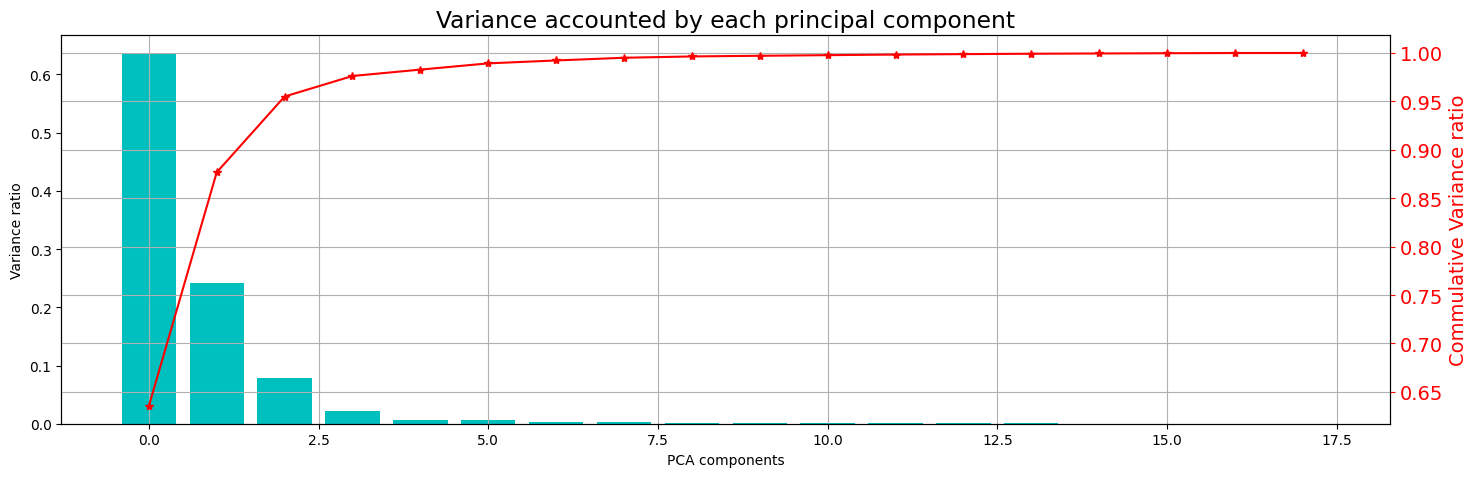

In [16]:
# Investigate the variance accounted by each principal component.
VarRat = pca.explained_variance_ratio_

Suma = 0
VarRatAcum = []

for var in pca.explained_variance_ratio_:
    Suma+=var
    VarRatAcum.append(Suma)

PCAvariance(VarRat, VarRatAcum)

- ***Selecting principal components responsible for the generation of 80% of the total data variance***

In [17]:
pca = PCA(n_components=2)
pca.fit(EmpleadosAttritionFinal[columns])
EmpleadosAttritionPCA = pca.transform(EmpleadosAttritionFinal[columns])

- ***Weights of variables for the 1st selected principal Component***

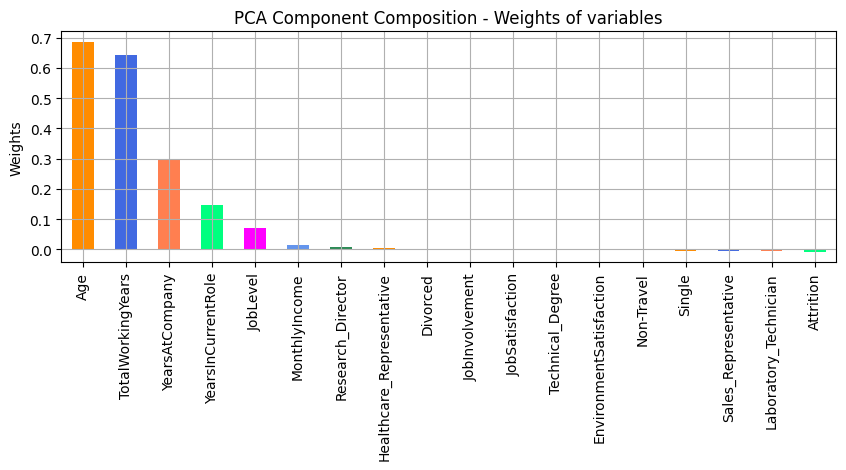

In [18]:
PCAcompWeights(pca, EmpleadosAttritionFinal, 1, plot=True, figsize=(10,3))

- ***Weights of variables for the 2nd selected principal Component***

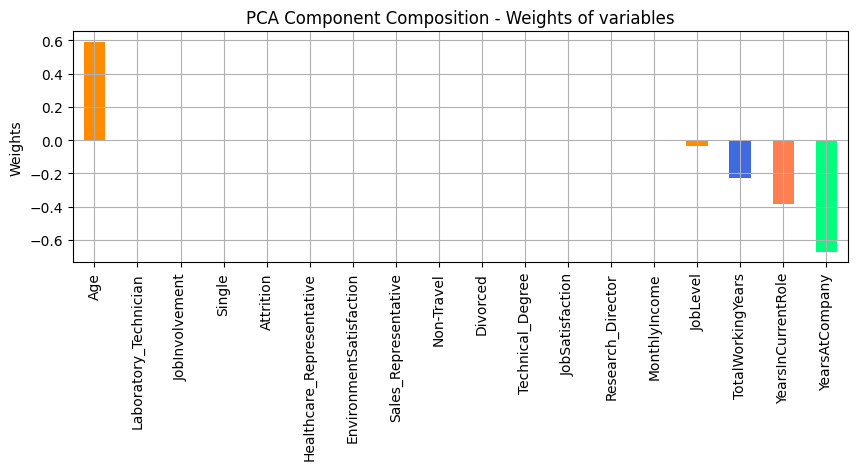

In [19]:
PCAcompWeights(pca, EmpleadosAttritionFinal, 2, plot=True, figsize=(10,3))

- ***Adding PCA components to the EmpleadosAttritionFinal dataframe***

In [20]:
for component in range(pca.components_.shape[0]):
    tmp_array = np.ones(EmpleadosAttritionFinal.shape[0])*np.nan
    tmp_array[:pca.components_[component,:].shape[0]] = pca.components_[component,:]
    EmpleadosAttritionFinal.loc[:,'C{}'.format(component)] = tmp_array

display(EmpleadosAttritionFinal.head(18))

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,YearsInCurrentRole,YearsAtCompany,Non-Travel,Technical_Degree,Healthcare_Representative,Laboratory_Technician,Research_Director,Sales_Representative,Divorced,Single,Attrition,C0,C1
0,50,4,3,4,4,0.866416,32,4,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.686132,0.591146
1,36,2,3,2,2,0.207855,7,2,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,-0.001626,0.001928
2,21,2,3,1,2,0.088280,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0.000074,0.003067
3,52,2,3,3,2,0.498811,18,6,8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0.071074,-0.036849
4,33,2,3,3,3,0.666120,15,6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.000340,-0.003891
5,47,3,2,3,2,0.492890,28,11,22,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.015901,-0.008203
6,22,4,2,2,4,0.199080,4,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.641905,-0.225587
7,33,3,3,2,4,0.230428,7,5,6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.147981,-0.381711
8,27,4,1,2,4,0.214727,8,2,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.299533,-0.672624
9,40,1,3,1,4,0.073849,8,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,-0.001848,-0.000855


### Saving Results

#### 14.	Guarda el set de datos que has formado y que tienes en EmpleadosAttritionFinal en un archivo CSV llamado EmpleadosAttritionFinal.csv. Las últimas columnas que colocaste quedarán después de la variable Attrition, lo cual no importa, pero si gustas lo puedes arreglar antes de escribir el archivo

In [21]:
path = os.path.join(os.getcwd(), 'Results', 'EmpleadosAttritionFinal.csv')
EmpleadosAttritionFinal.to_csv(path, index=False)

# FIN